# Lecture 11: Logistic Regression and Poisson Regression
- These are two types of generalized linear models (GLM).
- Generalization to linear models to model binary data and count data.
- Why are they still called linear models?

## 11.1 Logistic Regression
- Used to model binary outcome.
- More specifically, we model the probabilities.
    - We find the probabilities such that we are mostly likely to observe the actual data.
        - Maximum likelihood estimator (MLE)
- In contrast to linear regression, where we model the outcome directly.
    - We minimized the sum of squares from the model to the actual data.
        - Least squares estimator (LSE)

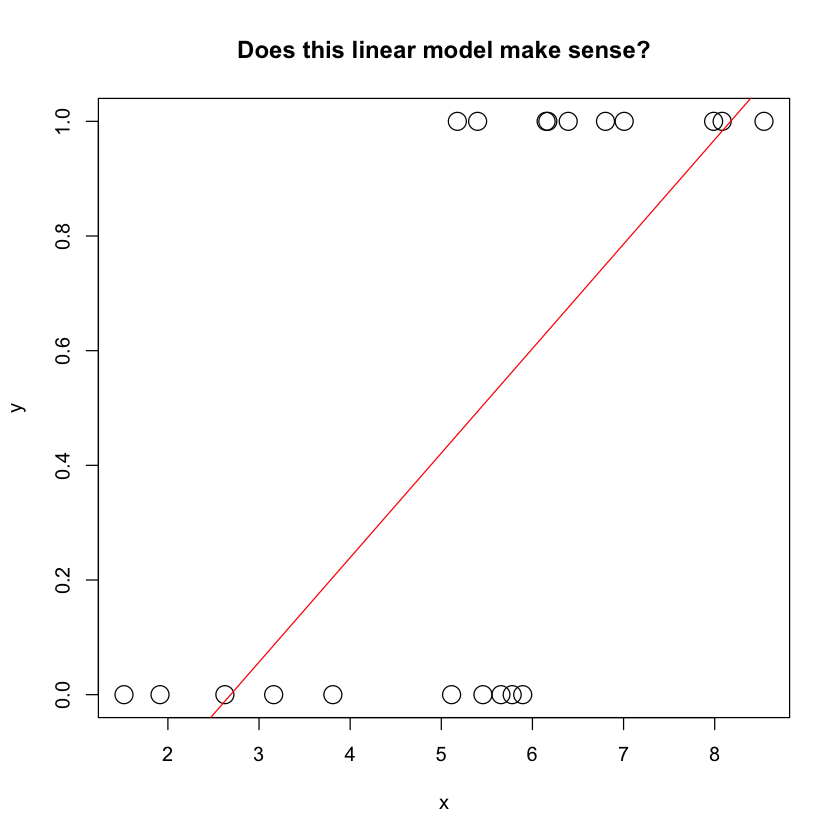

In [1]:
set.seed(613)
x <- c(runif(10, min = 1, max = 6), runif(10, min = 5, max = 10))
y <- c(rep(0,10), rep(1,10))
plot(x, y, main = "Does this linear model make sense?", cex = 2)
abline(lm(y~x), col = "red")

#### Solution
- Generalized linear models.
    - Logistic regression in this case.
    
#### Model assumptions
- Each sample $i$ follows a bernoulli distribution with probability $p_i$
    - Bernoulli distribution: Observing a head from tossing a fair coin $\sim Bernoulli(0.5)$
    - $\mathbb{P}(Y_i=1)=p_i$
    - $\mathbb{P}(Y_i=0)=1-p_i$
- All samples are independent
    - Data: $y_1=0,\ y_2=1,\ y_3=0$
    - Probabilities: $\mathbb{P}(y_1=0)=1-p_1$, $\mathbb{P}(y_2=1)=p_2$, $\mathbb{P}(y_3=0)=1-p_3$
    - Likelihood: $\ell=(1-p_1)\times p_2\times (1-p_3)$
- logit($p$) or $\log(\mathrm{odds})$ is linearly associated with the predictors.
    - odds = $p/(1-p)$

##### Maximize the likelihood $\ell$.

### Example: graduate school admission.
A simulated graduate school admission data. As we all know, stronger candidates have higher probability of getting in.
- admit
    - 1: admitted; 0: rejected.
- rank
    - 1: from good undergraduate schools; 0: from not as good undergraduate schools.
- gre
- gpa

In [2]:
df <- read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
df$rank <- ceiling(df$rank/2) - 1
head(df)

admit,gre,gpa,rank
0,380,3.61,1
1,660,3.67,1
1,800,4.00,0
1,640,3.19,1
0,520,2.93,1
1,760,3.00,0


#### If we only look at rank.
Investigate the association between admit and rank in terms of odds ratio.

In [3]:
table(df[,c("rank", "admit")])[c(2,1),c(2,1)]

    admit
rank   1   0
   1  40 148
   0  87 125

In [4]:
OR <- 40*125/(87*148); OR

[1] 0.3883194

##### Interpretation?

In [5]:
fit1 <- glm(admit~rank,
            family = binomial(link = "logit"),
            data = df)
summary(fit1)


Call:
glm(formula = admit ~ rank, family = binomial(link = "logit"), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0279  -1.0279  -0.6917   1.3347   1.7593  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.3624     0.1396  -2.596  0.00944 ** 
rank         -0.9459     0.2264  -4.178 2.94e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 481.66  on 398  degrees of freedom
AIC: 485.66

Number of Fisher Scoring iterations: 4


In [27]:
exp(fit1$coefficients)
OR

(Intercept)        rank 
  0.6960000   0.3883194

[1] 0.3883194

##### Why does $\exp(\beta_1)=\mathrm{OR}$?
##### The model is
$$ \log(\frac{p_i}{1-p_i})=\beta_0+\beta_1 \times rank_{i}$$
where $p_i$ is the probability of admission of the $i^{th}$ applicant.

Note that we use a linear predictor to model the probability. So it is called a generalized linear model.

##### Confidence interval
The CI is not symmetrical. It is symmetrical on the log scale.

In [7]:
exp(confint(fit1))

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),0.5279583,0.9134167
rank,0.2473729,0.6017864


##### Prediction

In [8]:
# type = "response" gives the fitted probability
nd <- data.frame(rank = c(0,1))
predict(fit1, type = "response", newdata = nd)

1         2 
0.4103774 0.2127660

On average, the probability of admission for rank 0 is 0.41 and 0.21 for rank 1.

In [9]:
# type = "link" give the fitted linear predictor
predict(fit1, type = "link", newdata = nd)

1          2 
-0.3624056 -1.3083328

Recall that $\log(\frac{p_i}{1-p_i}) = \beta_0 + \beta_1 \times rank_i$

In [10]:
log(0.212765957446936/(1-0.212765957446936))
log(0.410377358490567/(1-0.410377358490567))

[1] -1.308333

[1] -0.3624056

#### If we only look at GPA.
GPA is continuous, therefore we can no longer make the 2x2 table to get the odds ratio.

Regression!

In [11]:
fit2 <- glm(admit~gpa,
            family = binomial(),
            data = df)
summary(fit2)
# the link function for binomial family is logit by default - canonical link


Call:
glm(formula = admit ~ gpa, family = binomial(), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1131  -0.8874  -0.7566   1.3305   1.9824  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -4.3576     1.0353  -4.209 2.57e-05 ***
gpa           1.0511     0.2989   3.517 0.000437 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 486.97  on 398  degrees of freedom
AIC: 490.97

Number of Fisher Scoring iterations: 4


In [12]:
fit2$coefficients

(Intercept)         gpa 
  -4.357587    1.051109

In [13]:
exp(fit2$coefficients)

(Intercept)         gpa 
 0.01280926  2.86082123

In [14]:
exp(-4.35758730334778+1.05110872619157*4)/(1+exp(-4.35758730334778+1.05110872619157*4))

[1] 0.4617866

In [29]:
predict(fit2, newdata=data.frame(gpa=2.5), type="response")

1 
0.1506112

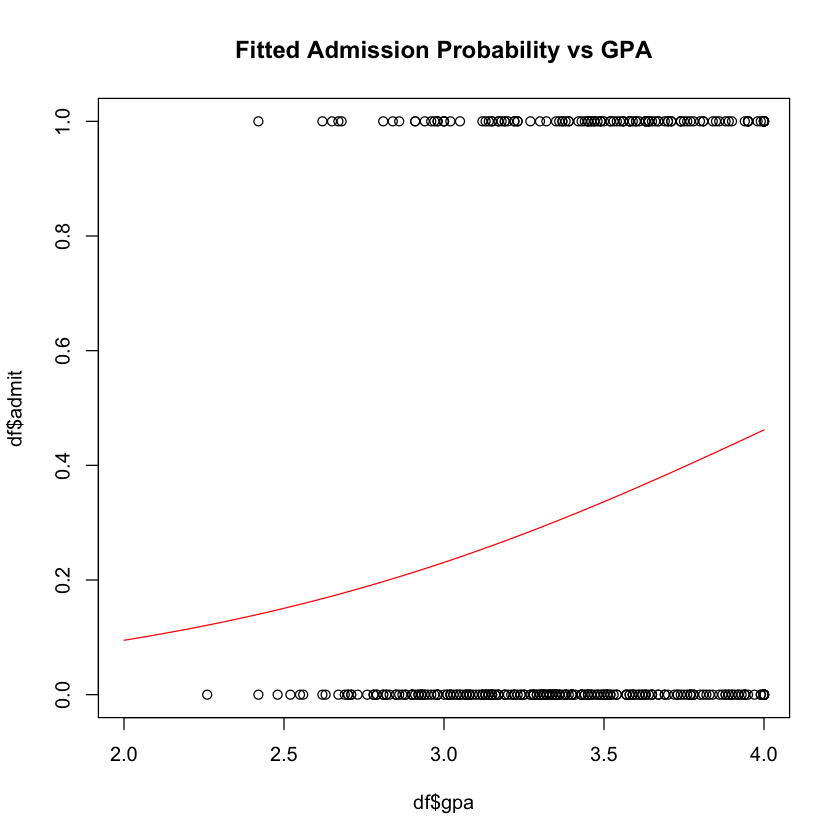

In [31]:
lb <- 2
ub <- 4
plot(x = df$gpa, y = df$admit,
     main = "Fitted Admission Probability vs GPA", xlim = c(lb,ub))
fitted.admit <- predict(fit2,
                        newdata = data.frame(gpa = seq(lb,ub,0.01)),
                        type = "response")
lines(sort(x = seq(lb,ub,0.01)), y = sort(fitted.admit), col = "red")

# The relationship should be a S-shaped curve.
# We are not seeing the curve because the range of GPA is too small.

#### If we look at all variables in the dataset.

In [16]:
fit3 <- glm(admit~., family = binomial(), data = df)
summary(fit3)


Call:
glm(formula = admit ~ ., family = binomial(), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4290  -0.8902  -0.6552   1.1937   2.1122  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.679673   1.100498  -4.252 2.12e-05 ***
gre          0.002280   0.001085   2.101  0.03568 *  
gpa          0.864058   0.327562   2.638  0.00834 ** 
rank        -0.938317   0.232946  -4.028 5.62e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 463.37  on 396  degrees of freedom
AIC: 471.37

Number of Fisher Scoring iterations: 3


#### Compare two models, one being a reduced version of the other (variable selection).
Note that even though we are using the anova( ) function, we are not performing analysis of variance. Instead, we are performing analysis of deviance.
- Residual deviance is $-2 \log \mathrm{likelihood} $.
    - Because residuals in linear regression does not make sense anymore.
- Therefore the difference in deviances translates to the ratio of likelihoods.
- Likelihood ratio test - which is a $\chi^2$ test.

In [17]:
# print is not necessary in R or Rstudio.
print(anova(fit2, fit3, test = "LRT"))
# LRT -> likelihood ratio test
# test = "Chisq" is equivalent

Analysis of Deviance Table

Model 1: admit ~ gpa
Model 2: admit ~ gre + gpa + rank
  Resid. Df Resid. Dev Df Deviance  Pr(>Chi)    
1       398     486.97                          
2       396     463.37  2   23.594 7.526e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Reject the reduced model.
#### Test whether the model is significant - goodness of fit test
- Basically compare the model with the null model (intercept only model).

In [18]:
print(anova(fit1, test = "Chisq"))

Analysis of Deviance Table

Model: binomial, link: logit

Response: admit

Terms added sequentially (first to last)


     Df Deviance Resid. Df Resid. Dev  Pr(>Chi)    
NULL                   399     499.98              
rank  1   18.313       398     481.66 1.874e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## 11.2 Poisson Regression
- Used to model count data
    - Poisson distribution is commonly used to model counts.
    - $Y\sim Poisson(\lambda)$, then the mean and variance of $Y$ are both $\lambda$.
    - PDF: $\mathbb{P}(Y=y|\lambda)=\frac{e^{-\lambda}\lambda^y}{y!}$
- Specifically, use Poisson distributions to model the count and use regression to model the rate parameter $\lambda$.
- Find the parameters that maximize the probability of observing the actual data.
    - Again, MLE.
    
### Example: Ship damage data
- incidents
    - Numver of damage incidents during service
- service
    - Aggregate months of service
- type
    - 5 types of ships, A-E
- year
    - Year of construction

In [19]:
library(MASS)
ds <- ships
ds <- ds[ds$service>0, ]
head(ds)

type,year,period,service,incidents
A,60,60,127,0
A,60,75,63,0
A,65,60,1095,3
A,65,75,1095,4
A,70,60,1512,6
A,70,75,3353,18


#### If we only look at number of incidents vs. ship type

In [20]:
fit4 <- glm(incidents~type,
            family = poisson(link = "log"),
            data = ds)
summary(fit4)


Call:
glm(formula = incidents ~ type, family = poisson(link = "log"), 
    data = ds)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.6716  -2.2039  -0.5921   0.8632   4.0113  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.7918     0.1543  11.612  < 2e-16 ***
typeB         1.7957     0.1666  10.777  < 2e-16 ***
typeC        -1.2528     0.3273  -3.827  0.00013 ***
typeD        -0.9045     0.2875  -3.146  0.00165 ** 
typeE        -0.1178     0.2346  -0.502  0.61570    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 614.54  on 33  degrees of freedom
Residual deviance: 170.71  on 29  degrees of freedom
AIC: 278.58

Number of Fisher Scoring iterations: 6


In [21]:
summary(fit4)$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),1.7917595,0.1543033,11.611929,3.584389e-31
typeB,1.7957199,0.1666196,10.777362,4.403311e-27
typeC,-1.2527630,0.3273268,-3.827254,1.295807e-04
typeD,-0.9044563,0.2874596,-3.146377,1.653066e-03
typeE,-0.1177830,0.2346477,-0.501957,6.156978e-01


In [22]:
exp(confint(fit4))

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),4.3635322,8.0019099
typeB,4.3975819,8.4645779
typeC,0.1438568,0.5253836
typeD,0.2243790,0.6978918
typeE,0.5573675,1.4040665


##### Interpretation?
Does the result mean that Type B is more prone to damage than Type A?

#### Consider the duration of service in the incidents-type relationship.

In [23]:
# The canonical link for poisson regression is log, so omitted.
fit5 <- glm(incidents~type+offset(log(service)),
            family = poisson(), data = ds)
summary(fit5)


Call:
glm(formula = incidents ~ type + offset(log(service)), family = poisson(), 
    data = ds)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.3041  -0.9926  -0.4034   0.7209   3.6616  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -5.4202     0.1543 -35.127  < 2e-16 ***
typeB        -0.8837     0.1666  -5.304 1.13e-07 ***
typeC        -0.8260     0.3273  -2.524   0.0116 *  
typeD        -0.1459     0.2875  -0.507   0.6118    
typeE         0.3429     0.2346   1.461   0.1439    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 146.328  on 33  degrees of freedom
Residual deviance:  90.889  on 29  degrees of freedom
AIC: 198.76

Number of Fisher Scoring iterations: 5


#### Further include the year of construction in the model.

In [24]:
fit6 <- glm(incidents~type+as.factor(year)+offset(log(service)), family = poisson(), data = ds)

#### Further include period in the relationship

In [25]:
fit7 <- glm(incidents~type+as.factor(year)+as.factor(period)+offset(log(service)), family = poisson(), data = ds)

#### Model comparison (variable selection)

In [26]:
# anova() allows for comparison of many models at the same time.
print(anova(fit5, fit6, fit7, test = "LRT"))

Analysis of Deviance Table

Model 1: incidents ~ type + offset(log(service))
Model 2: incidents ~ type + as.factor(year) + offset(log(service))
Model 3: incidents ~ type + as.factor(year) + as.factor(period) + offset(log(service))
  Resid. Df Resid. Dev Df Deviance  Pr(>Chi)    
1        29     90.889                          
2        26     49.355  3   41.534 5.038e-09 ***
3        25     38.695  1   10.660  0.001095 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
